# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 0.1
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5
optimizers=[keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adam, keras.optimizers.Adagrad]

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for opt in optimizers:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with learn rate = %.6f" % (LEARNING_RATE))
    print("Experiment with optimizer = %s" % (opt))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = opt(learning_rate=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-opt-%s" % str(opt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

l_accuracy: 0.1000
Epoch 28/50
196/196 [==============================] - 12s 60ms/step - loss: 2.3079 - accuracy: 0.1007 - val_loss: 2.3095 - val_accuracy: 0.1000
Epoch 29/50
196/196 [==============================] - 11s 57ms/step - loss: 2.3077 - accuracy: 0.0957 - val_loss: 2.3113 - val_accuracy: 0.1000
Epoch 30/50
196/196 [==============================] - 11s 54ms/step - loss: 2.3075 - accuracy: 0.1027 - val_loss: 2.3273 - val_accuracy: 0.1000
Epoch 31/50
196/196 [==============================] - 9s 47ms/step - loss: 2.3076 - accuracy: 0.1010 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 32/50
196/196 [==============================] - 8s 43ms/step - loss: 2.3079 - accuracy: 0.1012 - val_loss: 2.3122 - val_accuracy: 0.1000
Epoch 33/50
196/196 [==============================] - 8s 40ms/step - loss: 2.3079 - accuracy: 0.0994 - val_loss: 2.3073 - val_accuracy: 0.1000
Epoch 34/50
196/196 [==============================] - 8s 39ms/step - loss: 2.3080 - accuracy: 0.0985 - val_loss: 

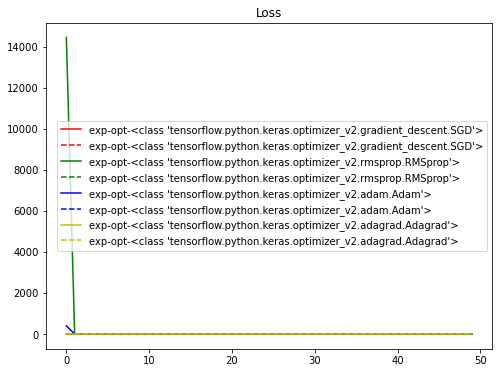

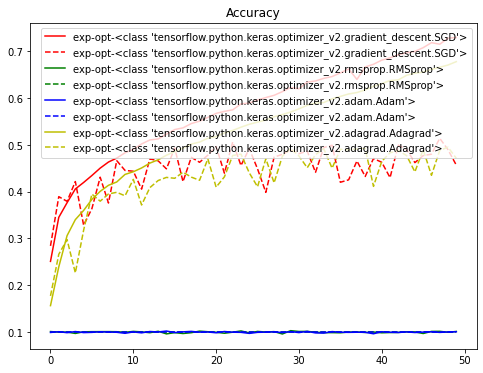

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()